In [2]:
import quantrocket.master
import pandas as pd, numpy as np
import math
from quantrocket import get_prices
from collections import defaultdict

In [81]:
df_all = get_prices("usstock-1d", universes="usstock", start_date="2020-01-03", fields=["Close", "Volume"])

In [84]:
size_i_start, size_i_end = -3, -1
tallest_sids = df_all.loc["Close"].mean().sort_values()[size_i_start:size_i_end].index.tolist()

In [85]:
df_prices = df_all[tallest_sids].fillna(method="ffill")

In [87]:
df_close = df_prices.loc["Close"]
df_volume = df_prices.loc["Volume"]

In [53]:
vv = None
def roll_func(v):
    global vv
    vv = v
    return np.mean(v)

<AxesSubplot:xlabel='Date'>

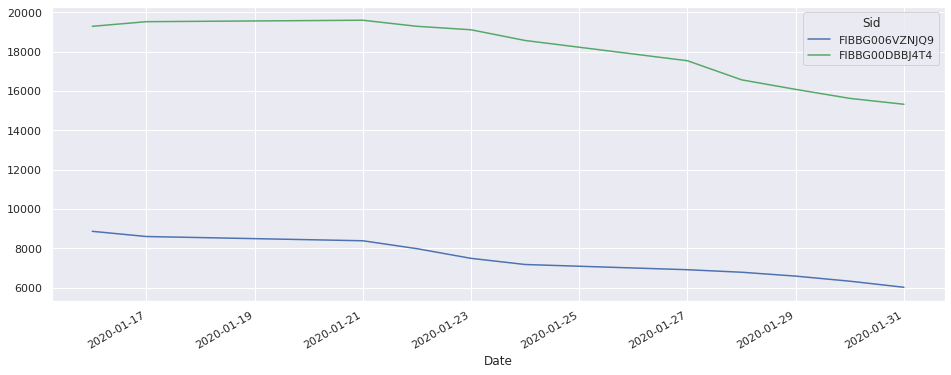

In [54]:
df_close.iloc[:20].rolling(10).apply(roll_func).plot()

<AxesSubplot:xlabel='Date'>

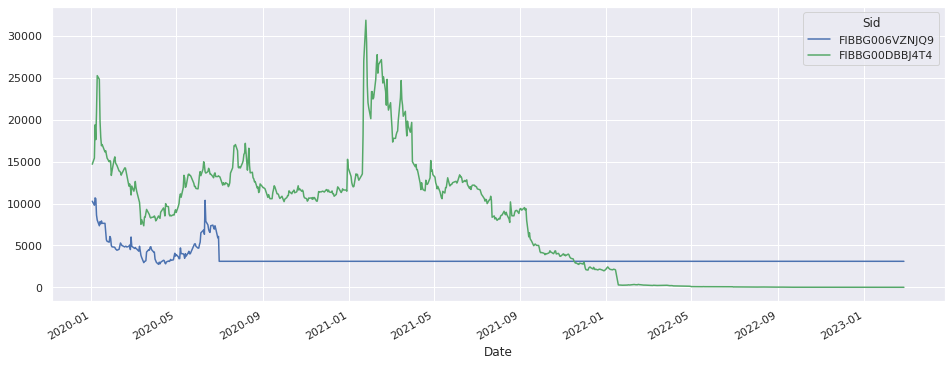

In [55]:
df_close.plot()

In [69]:
rows = vv
rows

Date
2020-01-17    17053.364
2020-01-21    16171.294
2020-01-22    16318.305
2020-01-23    15877.270
2020-01-24    15436.235
2020-01-27    14995.200
2020-01-28    15142.211
2020-01-29    14995.200
2020-01-30    13363.369
2020-01-31    13907.313
dtype: float64

<AxesSubplot:xlabel='Date'>

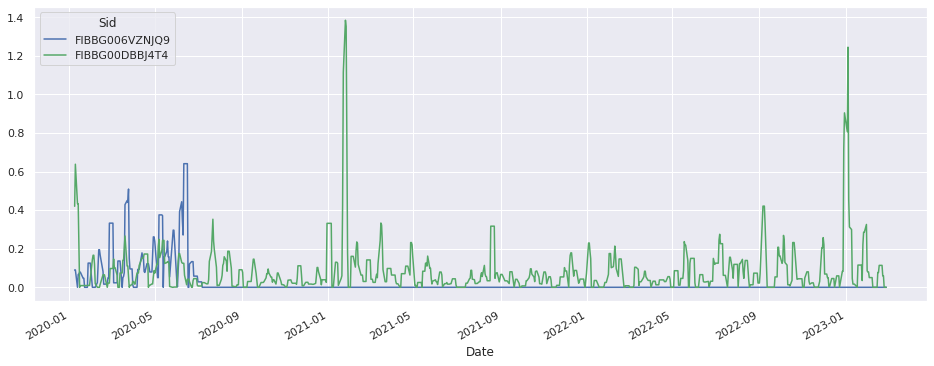

In [80]:
df_close.rolling(5).apply(get_max_jump).plot()

In [89]:
def get_max_jump(rows):
    minPrice = None
    maxJump = None
    minPriceEpochSeconds = 0

    for r in rows.iteritems():
        bwtClose = r[1];
        if minPrice is None or bwtClose < minPrice:
            minPrice = bwtClose
            minPriceEpochSeconds = r[0]

        jump = (bwtClose - minPrice) / minPrice;
        if maxJump is None or jump > maxJump:
            maxJump = jump
    return maxJump

def get_min_drop(rows):
    maxPrice = None
    minDrop = None
    minPriceEpochSeconds = 0

    for r in rows.iteritems():
        bwtClose = r[1];
        if maxPrice is None or bwtClose > maxPrice:
            maxPrice = bwtClose
            maxPriceEpochSeconds = r[0]

        drop = (bwtClose - maxPrice) / maxPrice
        if minDrop is None or drop < minDrop:
            minDrop = drop
    return minDrop

In [ ]:

def get_jump_after_min_drop(rows):
    maxPrice = None
    minDrop = None
    minPriceEpochSeconds = 0

    for r in rows.iteritems():
        bwtClose = r[1];
        if maxPrice is None or bwtClose > maxPrice:
            maxPrice = bwtClose
            maxPriceEpochSeconds = r[0]

        drop = (bwtClose - maxPrice) / maxPrice
        if minDrop is None or drop < minDrop:
            minDrop = drop
    return minDrop

In [ ]:
'''

Double minPrice = null;
Double maxPrice = null;
Change maxJump = null;
Change minDrop = null;
long minPriceEpochSeconds = 0;
long maxPriceEpochSeconds = 0;
double change = 0;

for (BarWithTime bwt : bwtSlidingWindow.window) {
    if (!bwtSlidingWindow.isEpochSecondsInWindow(bwt.epochSeconds, parameter.windowSize)) {
        continue;
    }

    double bwtClose = bwt.bar.ohlc.close;
    if (minPrice == null || bwtClose < minPrice) {
        minPrice = bwtClose;
        minPriceEpochSeconds = bwt.epochSeconds;
    }
    double jump = (bwtClose - minPrice) / minPrice;
    if (maxJump == null || jump > maxJump.change) {
        maxJump = Change.builder()
                .change(jump)
                .priceAtChange(bwtClose)
                .priceAtChangeEpochSeconds(bwt.epochSeconds)
                .priceChangedFrom(minPrice)
                .priceChangedFromEpochSeconds(minPriceEpochSeconds)
                .build();
    }

    if (maxPrice == null || bwtClose > maxPrice) {
        maxPrice = bwtClose;
        maxPriceEpochSeconds = bwt.epochSeconds;
    }
    double drop = (bwtClose - maxPrice) / maxPrice;
    if (minDrop == null || drop < minDrop.change) {
        minDrop = Change.builder()
                .change(drop)
                .priceAtChange(bwtClose)
                .priceAtChangeEpochSeconds(bwt.epochSeconds)
                .priceChangedFrom(maxPrice)
                .priceChangedFromEpochSeconds(maxPriceEpochSeconds)
                .build();
    }
}

double firstClose = bwtSlidingWindow.window.getFirst().bar.ohlc.close;
double recentClose = bwtSlidingWindow.window.getLast().bar.ohlc.close;
change = (recentClose - firstClose) / firstClose;

'''

